In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
data = pd.read_csv(r'C:\Users\Abhin\Downloads\omdena_water_scarcity-data_exploration\omdena_water_scarcity-data_exploration\datafiles\land_use\algiers_cities_landUse_2020-2023.csv')
data.head()

,date,city,water,trees,grass,flooded_vegetation,crops,shrub_and_scrub,built,bare,snow_and_ice,label
0,20-01-03,Rahmania,0.064347,0.203569,0.079706,0.038857,0.138457,0.069763,0.197335,0.053184,0.038343,4
1,20-01-03,Bab Ezzouar,0.064347,0.203569,0.079706,0.038857,0.138457,0.069763,0.197335,0.053184,0.038343,4
2,20-01-03,Reghaia,0.064347,0.203569,0.079706,0.038857,0.138457,0.069763,0.197335,0.053184,0.038343,4
3,20-01-03,El Mouradia,0.064347,0.203569,0.079706,0.038857,0.138457,0.069763,0.197335,0.053184,0.038343,4
4,20-01-03,Baba Hassen,0.064347,0.203569,0.079706,0.038857,0.138457,0.069763,0.197335,0.053184,0.038343,4


In [3]:
print('Data Types:')
print(data.dtypes)
print('\nMissing Values:')
print(data.isnull().sum())

Data Types:
date                   object
city                   object
water                 float64
trees                 float64
grass                 float64
flooded_vegetation    float64
crops                 float64
shrub_and_scrub       float64
built                 float64
bare                  float64
snow_and_ice          float64
label                   int64
dtype: object

Missing Values:
date                  0
city                  0
water                 0
trees                 0
grass                 0
flooded_vegetation    0
crops                 0
shrub_and_scrub       0
built                 0
bare                  0
snow_and_ice          0
label                 0
dtype: int64


In [4]:
data.describe()

,water,trees,grass,flooded_vegetation,crops,shrub_and_scrub,built,bare,snow_and_ice,label
count,20440.000000,20440.000000,20440.000000,20440.000000,20440.000000,20440.000000,20440.000000,20440.000000,20440.000000,20440.000000
mean,0.064495,0.106487,0.056018,0.036466,0.157935,0.094129,0.260979,0.089332,0.040823,5.090411
std,0.038629,0.039922,0.014519,0.004494,0.036498,0.027829,0.066644,0.049004,0.009037,0.678485
min,0.036706,0.029841,0.025287,0.029220,0.032711,0.044723,0.051135,0.040081,0.033782,0.000000
25%,0.051543,0.073428,0.044394,0.033261,0.135762,0.072517,0.210452,0.059333,0.036649,5.000000
50%,0.058506,0.103344,0.050384,0.035834,0.160775,0.091880,0.244044,0.079989,0.039042,5.000000
75%,0.065322,0.129693,0.069909,0.038593,0.182312,0.114131,0.318845,0.104392,0.041628,5.000000
max,0.599788,0.225263,0.093936,0.070183,0.288942,0.182026,0.538057,0.537269,0.134804,8.000000


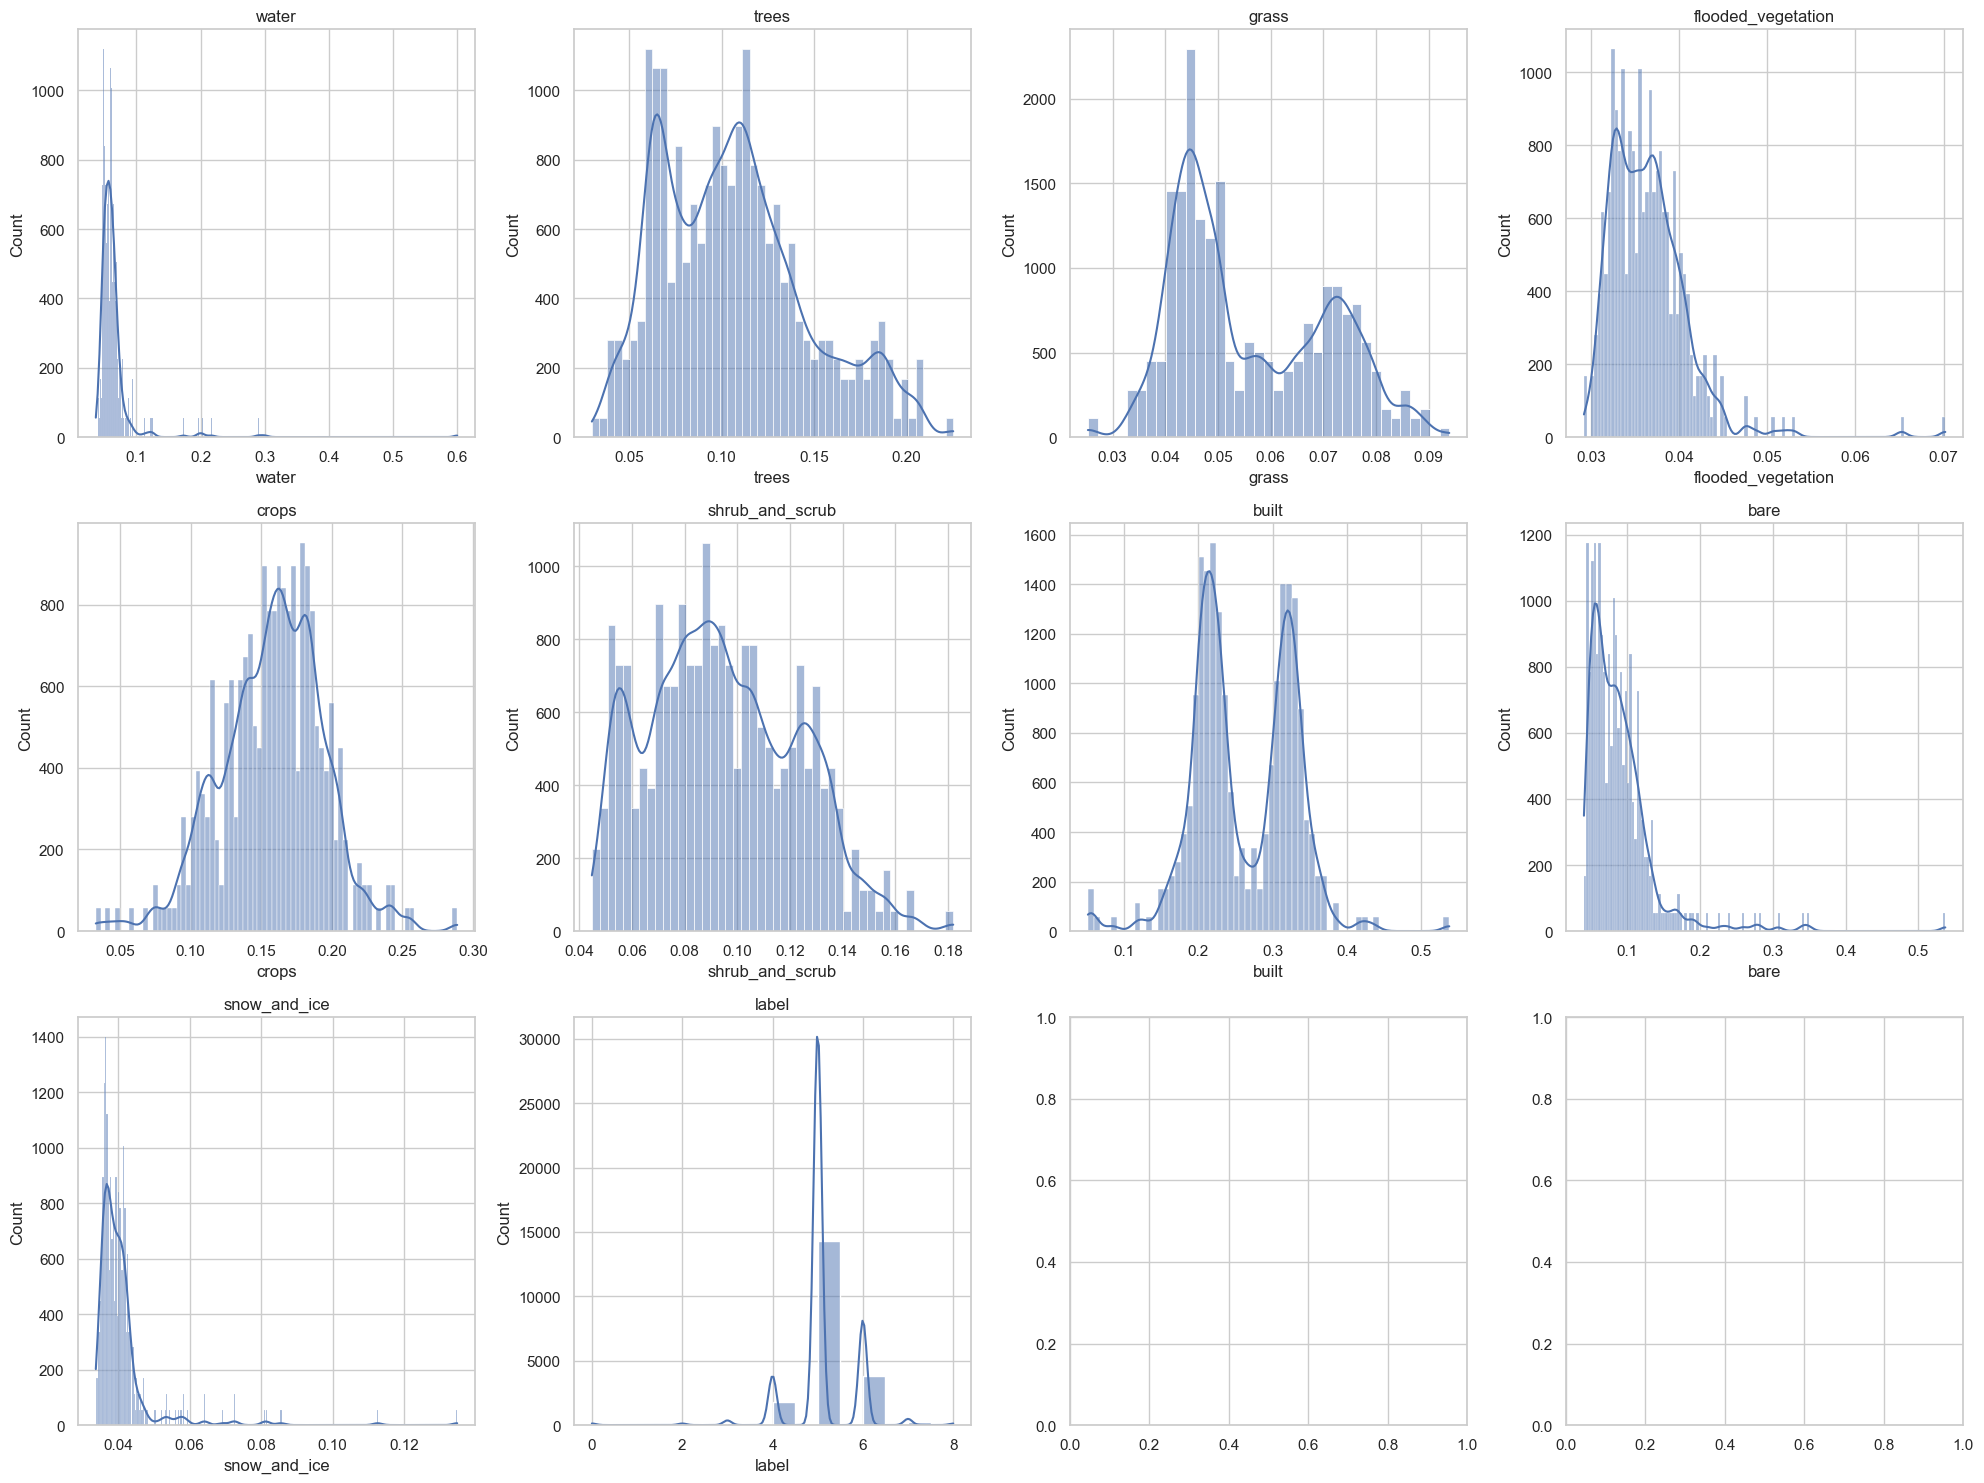

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
for idx, feature in enumerate(data.columns[2:]):
    ax = axes[int(idx / 4), idx % 4]
    sns.histplot(data[feature], kde=True, ax=ax)
    ax.set_title(feature)
plt.tight_layout()

<Figure size 1500x600 with 0 Axes>

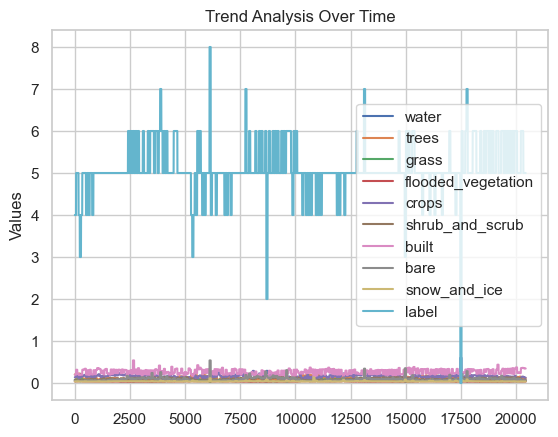

In [6]:
# Ensure only numeric columns are selected for trend analysis
numeric_columns = data.select_dtypes(include=[np.number])

plt.figure(figsize=(15, 6))
numeric_columns.groupby(numeric_columns.index).mean().plot()
plt.title('Trend Analysis Over Time')
plt.ylabel('Values')
plt.show()

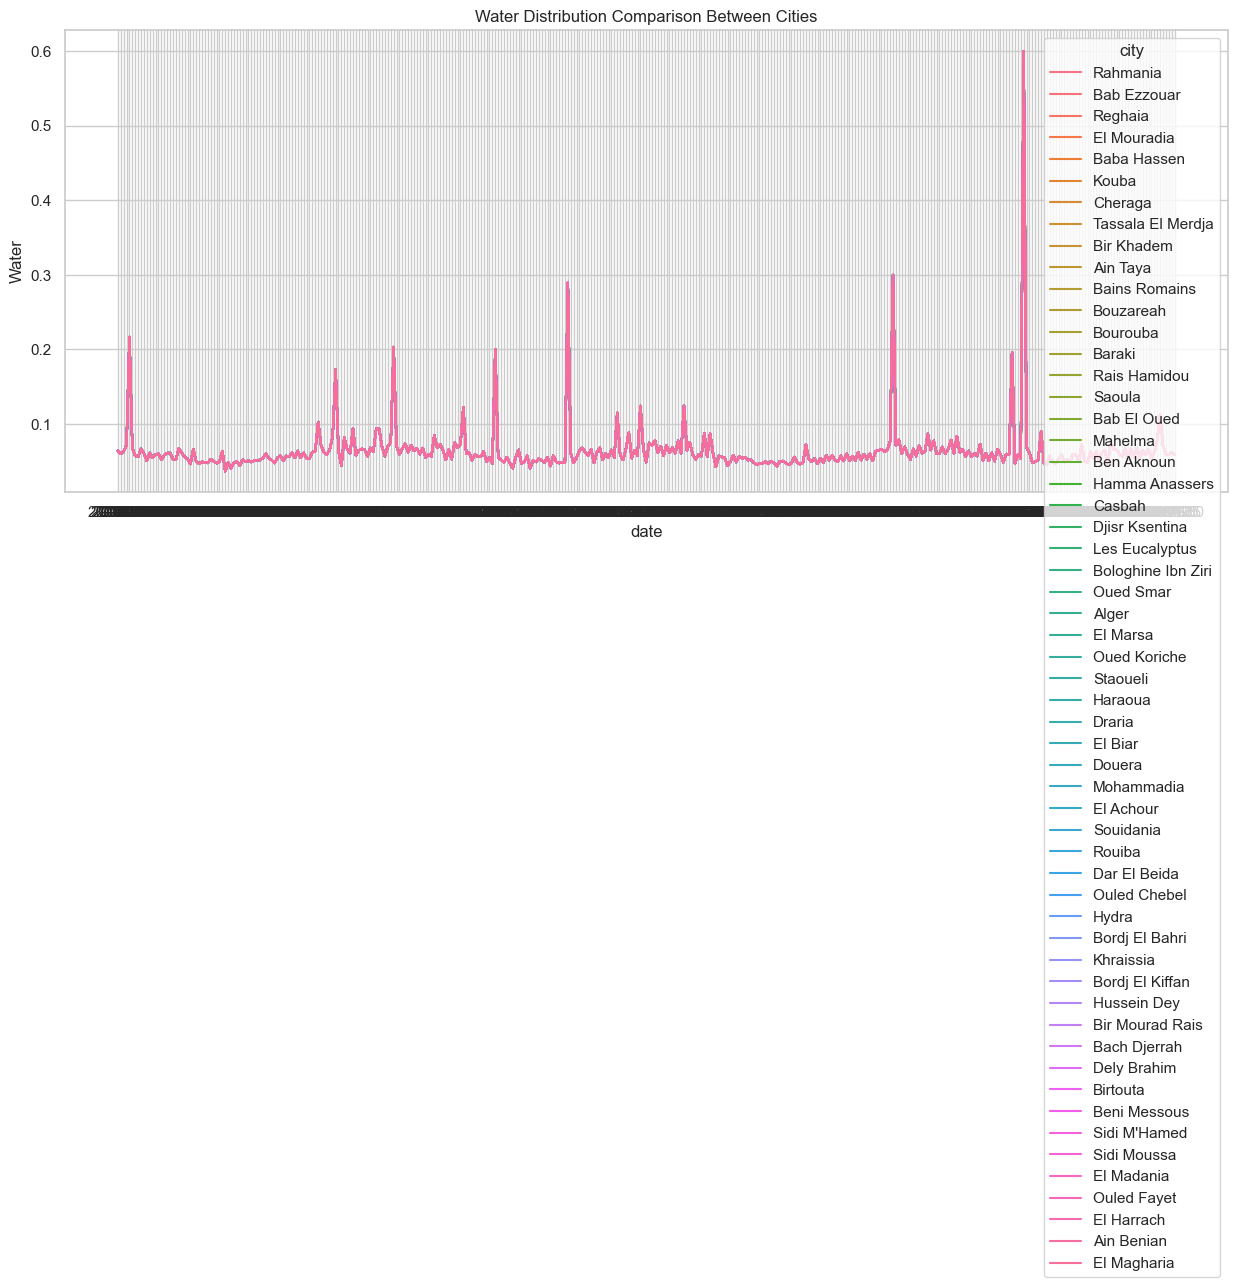

In [7]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=data, x='date', y='water', hue='city')
plt.title('Water Distribution Comparison Between Cities')
plt.ylabel('Water')
plt.show()

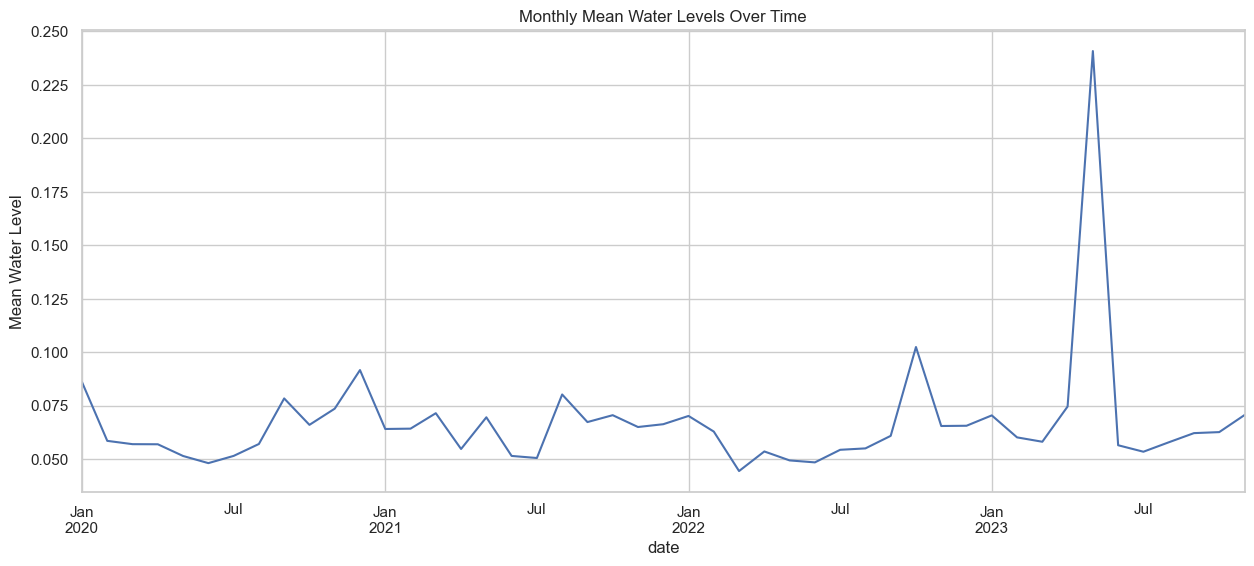

In [8]:
data.reset_index(inplace=True)
data['date'] = pd.to_datetime(data['date'], format='%y-%m-%d')
data.set_index('date', inplace=True)

# Extract only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Resample and calculate the mean for each month
monthly_mean = numeric_data.resample('M').mean()

# Plotting the trend for a specific variable, e.g., 'water'
monthly_mean['water'].plot(figsize=(15, 6))
plt.title('Monthly Mean Water Levels Over Time')
plt.ylabel('Mean Water Level')
plt.show()

## Conclusion

I did a comprehensive exploratory data analysis (EDA) of a water scarcity dataset. It methodically employs standard data science practices, beginning with importing necessary libraries for data handling and visualization, followed by loading and initial inspection of the dataset. The notebook emphasizes data quality assessment through checks for data types and missing values, and further provides a statistical summary of the data, aiding in understanding its distribution and central tendencies. Additionally, it incorporates visual analyses, crucial for identifying patterns and outliers. This EDA forms a solid foundation for any further in-depth analysis or modeling, showcasing a balanced approach between statistical rigor and visual exploration to extract meaningful insights from the dataset.